In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [5]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [6]:
df = pd.DataFrame(lista_alumnos, columns=['Nombre', "Edad", "Altura"])
df

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [8]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


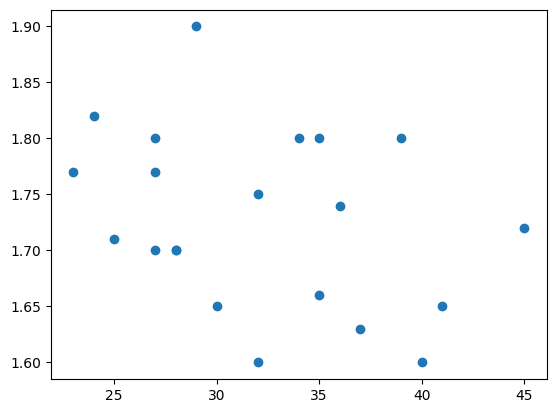

In [9]:
plt.scatter(df["Edad"], df["Altura"])

<Axes: xlabel='Edad', ylabel='Altura'>

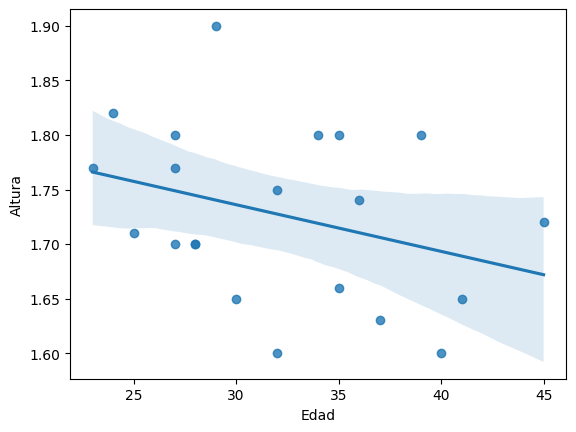

In [10]:
sns.regplot(x=df['Edad'], y=df['Altura'])

<Axes: >

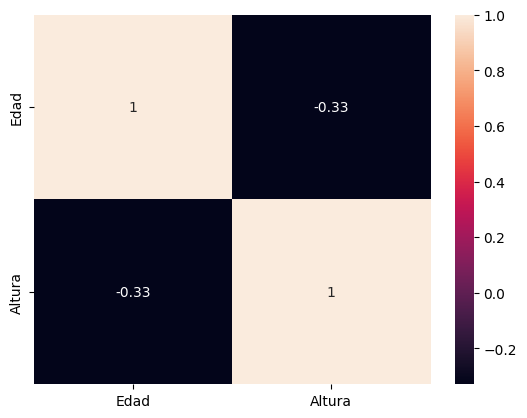

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

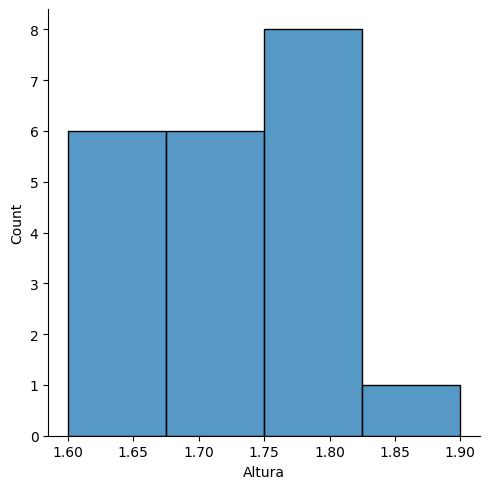

In [12]:
sns.displot(df['Altura'],bins=4)

### Entrena un modelo de regresión lineal

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X = df[['Edad']]
y = df['Altura']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(5, 1)
(16,)
(5,)


y = a + b*x

altura = a + b*Edad

In [16]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [17]:
lr.intercept_

np.float64(1.9428809062149202)

In [18]:
lr.coef_

array([-0.00690785])

Altura = 1.94 - 0.007 * Edad

In [19]:
altura = 1.94 - 0.007 * 20
altura

1.7999999999999998

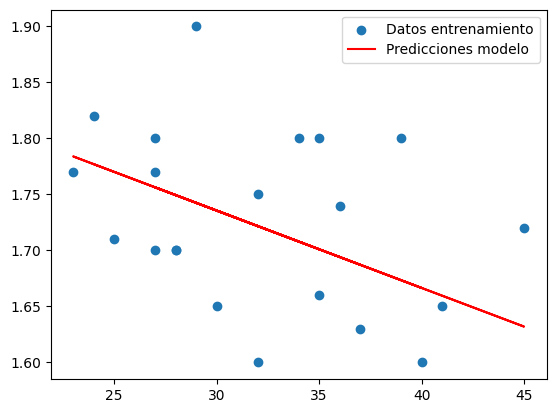

In [20]:
plt.scatter(df['Edad'], df['Altura'], label="Datos entrenamiento")
plt.plot(df['Edad'], lr.predict(X), color="r", label="Predicciones modelo")
plt.legend()

In [21]:
y_pred = lr.predict(X_test)
y_pred

array([1.69419839, 1.67347484, 1.70110624, 1.77018471, 1.73564547])

In [22]:
df_eval = pd.DataFrame(X_test)
df_eval['Prediccion'] = y_pred
df_eval["Valor_real"] = y_test
df_eval['error'] = abs(df_eval['Prediccion'] - df_eval["Valor_real"])
df_eval

,Edad,Prediccion,Valor_real,error
8,36,1.694198,1.74,0.045802
13,39,1.673475,1.80,0.126525
20,35,1.701106,1.80,0.098894
1,25,1.770185,1.71,0.060185
11,30,1.735645,1.65,0.085645


In [23]:
df_eval['error'].mean()

np.float64(0.08341014389223393)

In [24]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

np.float64(0.08341014389223393)

In [25]:
df_eval['error_cuad'] = df_eval['error'] ** 2
df_eval['error_cuad'].mean()

np.float64(0.00776874525279269)

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

np.float64(0.00776874525279269)

In [27]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

np.float64(0.047731517116659405)

In [28]:
lr.predict([[10]])

C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.87380243])